In [10]:
from overturemaps import core
import geopandas as gpd
import matplotlib.pyplot as plt

# https://github.com/OvertureMaps/overturemaps-py/blob/main/overturemaps/examples/geopandas_example.ipynb

In [2]:
# Manhattan
bbox = (-74.047285, 40.682944, -73.9067, 40.8776)

In [29]:
gdf = core.geodataframe("building", bbox=bbox)
gdf.head(3)


,id,geometry,bbox,version,sources,subtype,class,names,level,has_parts,...,min_height,min_floor,facade_color,facade_material,roof_material,roof_shape,roof_direction,roof_orientation,roof_color,roof_height
0,08b2a1070c945fff0200dcbc256b997f,"POLYGON ((-74.04727 40.68987, -74.04723 40.689...","{'xmin': -74.04727172851562, 'xmax': -74.04680...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",None,None,None,1.0,False,...,NaN,NaN,None,None,metal,gabled,NaN,along,#43B3AE,3.5
1,08b2a1070c944fff0200a7d9b021b4e8,"POLYGON ((-74.04708 40.6904, -74.04698 40.6904...","{'xmin': -74.04713439941406, 'xmax': -74.04679...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",service,service,"{'primary': 'Generator Building', 'common': No...",NaN,False,...,NaN,NaN,#AC8167,brick,None,None,NaN,None,#FFFFFF,NaN
2,08b2a1070c963fff0200bd0f07d78e2a,"POLYGON ((-74.04701 40.69035, -74.0469 40.6902...","{'xmin': -74.04701232910156, 'xmax': -74.04661...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",service,service,None,NaN,False,...,NaN,NaN,None,stone,None,None,NaN,None,#778899,NaN


Text(0.5, 1.0, 'Site of first USA vote tally collection')

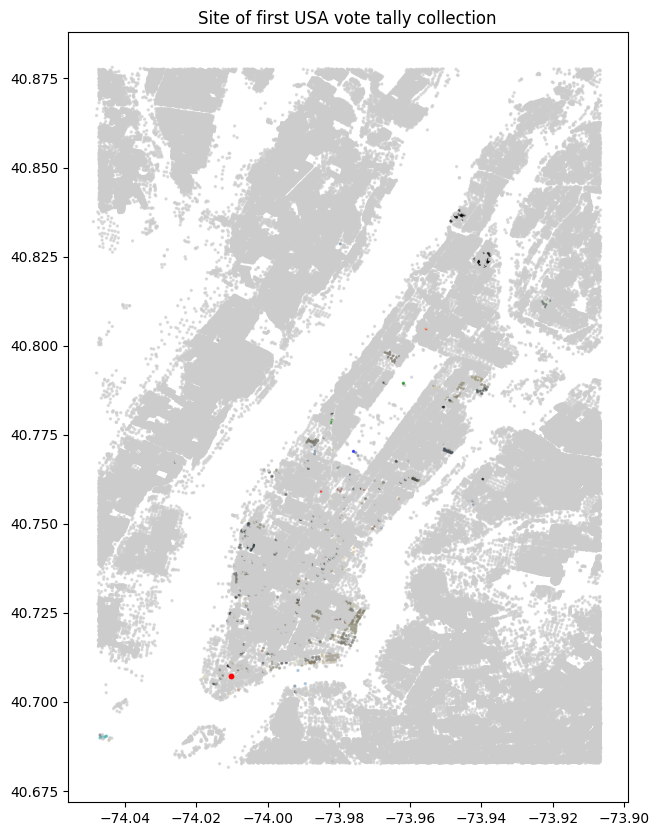

In [ ]:
# Convert to centroid instead of polygon
gdf.geometry =  gdf.centroid
from shapely.geometry import Point

# federal hall location
federal_hall_point = Point(-74.01034394954884, 40.707322845695046)  # (longitude, latitude)
federal_hall = gpd.GeoDataFrame(geometry=[federal_hall_point])

def is_valid_color(color):
    try:
        plt.cm.colors.to_rgba(color)  # Try to convert to RGBA format
        return True
    except ValueError:
        return False

# Apply a check and replace invalid colors
gdf['roof_color'] = gdf['roof_color'].apply(lambda x: x if is_valid_color(x) else '#CCCCCC')

fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(ax=ax, markersize=2, color=gdf['roof_color'], alpha=.6)
federal_hall.plot(ax=ax, color='red', markersize=10)  # Big red dot (markersize=100)

# Optionally, set axis labels and title
ax.set_title("Site of first USA vote tally collection")
